In [ ]:
from IPython.display import display
import pandas as pd
data = pd.read_csv('/data/data_pre_BTL.csv')
display(data.head(5))

,datetime,temp,dewpoint,maxtemp,mintemp,precipitation,humidity,windspeed,winddeg
0,1/1/2023,14.16,9.77,19.33,9.40,0.010,76.24,1.82,24.4
1,1/2/2023,14.27,11.14,18.47,9.99,0.730,82.32,2.55,44.3
2,1/3/2023,14.76,9.85,18.88,10.95,0.130,73.39,2.07,27.7
3,1/4/2023,15.89,12.86,20.89,12.52,0.625,83.76,1.77,118.7
4,1/5/2023,17.14,14.35,21.10,13.35,0.625,84.15,2.28,42.7


In [ ]:
df_normal = pd.read_csv('/data/datanormal_maxtemp_BTL.csv')
display(df_normal)

,maxtemp,temp,dewpoint,mintemp
0,0.280184,0.276152,0.299203,0.244596
1,0.251969,0.280561,0.353785,0.268215
2,0.265420,0.300200,0.302390,0.306645
3,0.331365,0.345491,0.422311,0.369496
4,0.338255,0.395591,0.481673,0.402722
...,...,...,...,...
887,0.756562,0.874549,0.966135,0.911529
888,0.761155,0.890581,0.987251,0.941553
889,0.722441,0.881764,0.994422,0.951161
890,0.604003,0.824449,0.948207,0.902722


In [3]:
df_normal[:10]

,maxtemp,temp,dewpoint,mintemp
0,0.280184,0.276152,0.299203,0.244596
1,0.251969,0.280561,0.353785,0.268215
2,0.265420,0.300200,0.302390,0.306645
3,0.331365,0.345491,0.422311,0.369496
4,0.338255,0.395591,0.481673,0.402722
5,0.375328,0.316633,0.325498,0.231785
6,0.354331,0.377555,0.311952,0.339872
7,0.382874,0.403206,0.462550,0.421137
8,0.390092,0.455311,0.527490,0.486389
9,0.304790,0.413226,0.554980,0.479984


In [4]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Chọn biến
features = ['maxtemp','temp','dewpoint','mintemp']
data_features = df_normal[features].values

# Chọn window
window_size = 7
X_train, y_train = [], []

for i in range(len(data_features) - window_size):
    X_train.append(data_features[i:i + window_size])
    y_train.append(data_features[i + window_size])

X_train = np.array(X_train)
y_train = np.array(y_train)

# Phân chia tập train với test
split_index = int(0.8 * len(X_train))

X_train, X_test = X_train[:split_index], X_train[split_index:]
y_train, y_test = y_train[:split_index], y_train[split_index:]

# Reshape dữ liệu cho mô hình LSTM
X_train = X_train.reshape((X_train.shape[0], window_size, X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], window_size, X_test.shape[2]))

In [5]:
X_train[:5]

array([[[0.28018373, 0.2761523 , 0.29920319, 0.24459568],
        [0.2519685 , 0.28056112, 0.35378486, 0.26821457],
        [0.26541995, 0.3002004 , 0.30239044, 0.30664532],
        [0.33136483, 0.34549098, 0.42231076, 0.3694956 ],
        [0.33825459, 0.39559118, 0.48167331, 0.40272218],
        [0.37532808, 0.31663327, 0.32549801, 0.23178543],
        [0.35433071, 0.37755511, 0.31195219, 0.3398719 ]],

       [[0.2519685 , 0.28056112, 0.35378486, 0.26821457],
        [0.26541995, 0.3002004 , 0.30239044, 0.30664532],
        [0.33136483, 0.34549098, 0.42231076, 0.3694956 ],
        [0.33825459, 0.39559118, 0.48167331, 0.40272218],
        [0.37532808, 0.31663327, 0.32549801, 0.23178543],
        [0.35433071, 0.37755511, 0.31195219, 0.3398719 ],
        [0.38287402, 0.40320641, 0.4625498 , 0.42113691]],

       [[0.26541995, 0.3002004 , 0.30239044, 0.30664532],
        [0.33136483, 0.34549098, 0.42231076, 0.3694956 ],
        [0.33825459, 0.39559118, 0.48167331, 0.40272218],
        [0

In [6]:
y_train[:5]

array([[0.38287402, 0.40320641, 0.4625498 , 0.42113691],
       [0.39009186, 0.45531062, 0.52749004, 0.48638911],
       [0.30479003, 0.41322645, 0.55498008, 0.47998399],
       [0.41830709, 0.45531062, 0.5752988 , 0.50280224],
       [0.50262467, 0.51022044, 0.6374502 , 0.48278623]])

In [7]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(64))
model.add(Dense(24))
model.add(Dense(len(features)))
model.compile(optimizer='adam', loss='mse')
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 7, 128)         │        68,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 24)             │         1,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           100 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 119,164 (465.48 KB)

 Trainable params: 119,164 (465.48 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.2095
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0180
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0140
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0132
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0140
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0135
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0138
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0131
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0125
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0136
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0115
Epoch 12/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0106
Epoch 13/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0100
Epoch 14/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0095
Epoch 15/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - lo

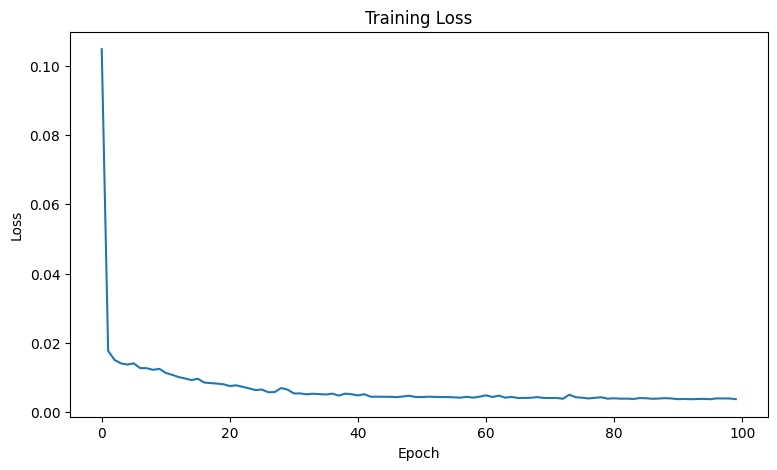

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 5))
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá mô hình
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step
Mean Absolute Error (MAE): 0.05233385007532917
Mean Squared Error (MSE): 0.004986292001376468
R2 Score: 0.8980176168729939


In [ ]:
results_text = f"Mean Absolute Error (MAE): {mae}\n" \
               f"Mean Squared Error (MSE): {mse}\n" \
               f"R2 Score: {r2}\n"

with open("/data/lstm/result_maxtemp_V.txt", "w") as file:
    file.write(results_text)

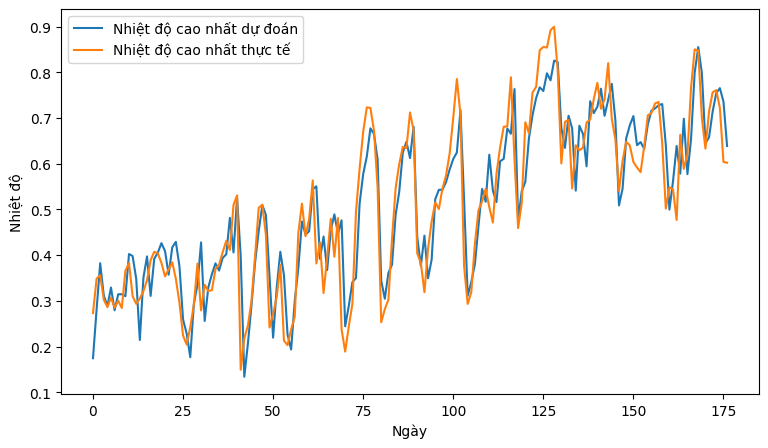

In [12]:
plt.figure(figsize=(9, 5))
plt.plot(y_pred[:,0], label='Nhiệt độ cao nhất dự đoán')
plt.plot(y_test[:,0], label='Nhiệt độ cao nhất thực tế')
plt.xlabel('Ngày')
plt.ylabel('Nhiệt độ')
plt.legend()
plt.show()

In [13]:
import sklearn
convert = sklearn.preprocessing.MinMaxScaler()
data_maxtemp = data['maxtemp'].values.reshape(-1,1)
convert.fit_transform(data_maxtemp)

y_pred_original = convert.inverse_transform(y_pred)

print("Dữ liệu dự đoán gốc:")
y_pred_original[:10]

Dữ liệu dự đoán gốc:


array([[16.110603, 16.591583, 18.125086, 17.082096],
       [19.345144, 19.110893, 19.360361, 18.294416],
       [22.444977, 22.066446, 22.50057 , 20.897627],
       [20.291336, 19.525034, 19.133825, 18.19241 ],
       [19.585974, 18.64046 , 18.359297, 17.331402],
       [20.82517 , 20.323929, 21.339315, 19.528547],
       [19.304733, 18.51782 , 19.214537, 17.670624],
       [20.37408 , 19.527744, 20.39513 , 18.586515],
       [20.375954, 19.507591, 20.395824, 18.623585],
       [20.248718, 19.502113, 20.449272, 18.711813]], dtype=float32)

In [14]:
y_original = convert.inverse_transform(y_test)
print("Dữ liệu thực tế gốc")
y_original[:10]

Dữ liệu thực tế gốc


array([[19.12      , 18.7062485 , 15.30735458, 16.34180144],
       [21.41      , 20.79525852, 21.09976892, 18.15986389],
       [21.65      , 20.16000401, 19.63041434, 15.95134508],
       [20.02      , 18.84062926, 17.56603187, 15.18263411],
       [19.52      , 18.31532265, 19.2418247 , 17.54977582],
       [20.15      , 18.71846493, 18.81680478, 16.18317854],
       [19.48      , 19.65913026, 18.0881992 , 17.23253002],
       [19.95      , 19.17047295, 18.69537052, 17.23253002],
       [19.46      , 19.54918236, 18.35535458, 17.22032826],
       [21.94      , 21.05180361, 22.41125896, 19.96572458]])

In [ ]:
df = pd.DataFrame({
    'Pre Maxtemp': y_pred_original[:,0].flatten(),
    'Act MaxTemp': y_original[:,0].flatten()
})

# Lưu DataFrame vào tệp
df.to_csv('/data/lstm/chart_max_V.csv', index=False)

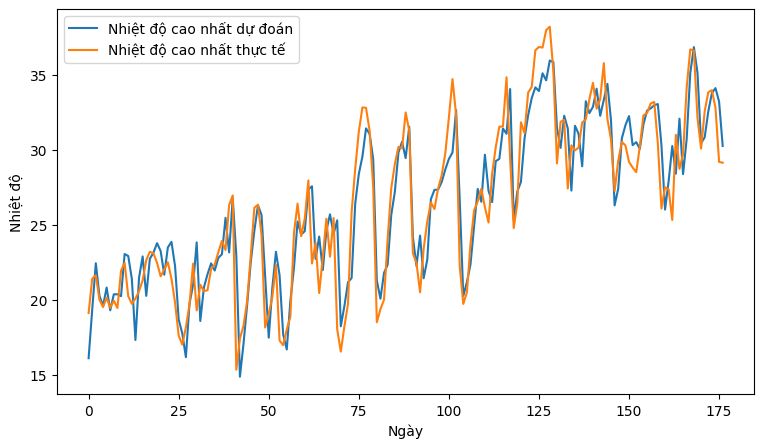

In [17]:
plt.figure(figsize=(9, 5))
plt.plot(y_pred_original[:,0], label='Nhiệt độ cao nhất dự đoán')
plt.plot(y_original[:,0], label='Nhiệt độ cao nhất thực tế')
plt.xlabel('Ngày')
plt.ylabel('Nhiệt độ')
plt.legend()
plt.show()